In [1]:
import polars as pl # testing polars as pandas alternative
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../Data/Default.csv')
pf = pl.read_csv('../Data/Default.csv')

pf.head(), df.head()

(shape: (5, 4)
 ┌─────────┬─────────┬─────────────┬──────────────┐
 │ default ┆ student ┆ balance     ┆ income       │
 │ ---     ┆ ---     ┆ ---         ┆ ---          │
 │ str     ┆ str     ┆ f64         ┆ f64          │
 ╞═════════╪═════════╪═════════════╪══════════════╡
 │ No      ┆ No      ┆ 729.526495  ┆ 44361.625074 │
 │ No      ┆ Yes     ┆ 817.180407  ┆ 12106.1347   │
 │ No      ┆ No      ┆ 1073.549164 ┆ 31767.138947 │
 │ No      ┆ No      ┆ 529.250605  ┆ 35704.493935 │
 │ No      ┆ No      ┆ 785.655883  ┆ 38463.495879 │
 └─────────┴─────────┴─────────────┴──────────────┘,
   default student      balance        income
 0      No      No   729.526495  44361.625074
 1      No     Yes   817.180407  12106.134700
 2      No      No  1073.549164  31767.138947
 3      No      No   529.250605  35704.493935
 4      No      No   785.655883  38463.495879)

In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
balance,10000.0,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308386,2654.322576
income,10000.0,33516.981876,13336.639563,771.967729,21340.462903,34552.644802,43807.729272,73554.233495


In [3]:
pf.describe()

describe,default,student,balance,income
str,str,str,f64,f64
"""count""","""10000""","""10000""",10000.0,10000.0
"""null_count""","""0""","""0""",0.0,0.0
"""mean""",null,null,835.374886,33516.981876
"""std""",null,null,483.714985,13336.639563
"""min""","""No""","""No""",0.0,771.967729
"""max""","""Yes""","""Yes""",2654.322576,73554.233495
"""median""",null,null,823.636973,34552.644802


In [4]:
df.describe().T.drop("count", axis = 1)

,mean,std,min,25%,50%,75%,max
balance,835.374886,483.714985,0.000000,481.731105,823.636973,1166.308386,2654.322576
income,33516.981876,13336.639563,771.967729,21340.462903,34552.644802,43807.729272,73554.233495


In [5]:
df["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [6]:
pf["default"].value_counts()

default,counts
str,u32
"""No""",9667
"""Yes""",333


In [7]:
df["student"].value_counts(), pf["student"].value_counts()

(No     7056
 Yes    2944
 Name: student, dtype: int64,
 shape: (2, 2)
 ┌─────────┬────────┐
 │ student ┆ counts │
 │ ---     ┆ ---    │
 │ str     ┆ u32    │
 ╞═════════╪════════╡
 │ No      ┆ 7056   │
 │ Yes     ┆ 2944   │
 └─────────┴────────┘)

<AxesSubplot: xlabel='balance', ylabel='income'>

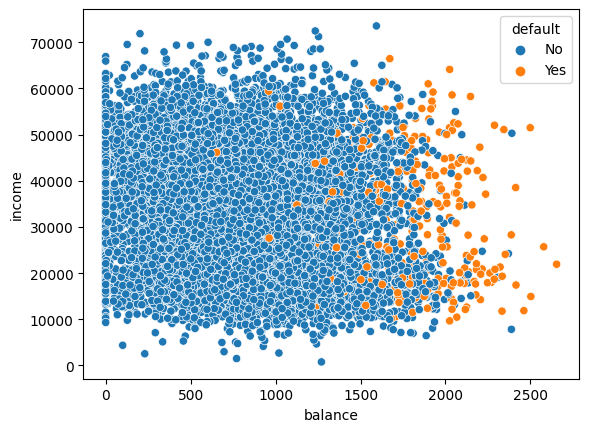

In [8]:
sns.scatterplot(data=pf, x="balance", y="income", hue = "default")
# balance = lånat belpopp

<AxesSubplot: xlabel='balance', ylabel='student'>

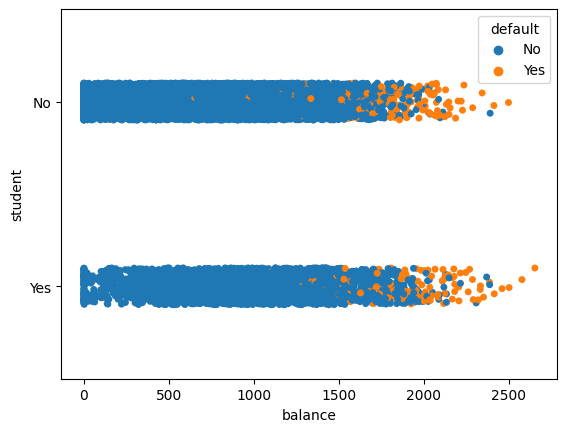

In [9]:
sns.stripplot(data=pf, x="balance", y="student", hue = "default")

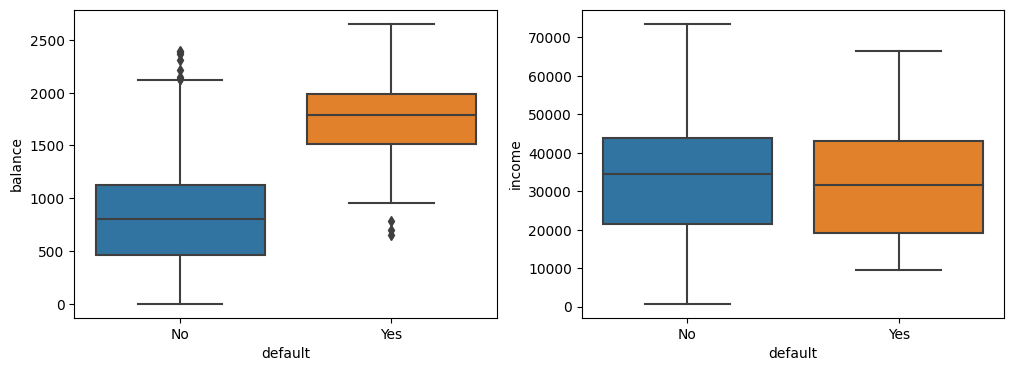

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

for ax, column in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y=column, ax=ax)

# outliers might wanna resign

## Dummy encode categorical variables

In [11]:
# one hot encoding
pd.get_dummies(df, columns=["default", "student"]).head()


,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,1,0,1,0
1,817.180407,12106.134700,1,0,0,1
2,1073.549164,31767.138947,1,0,1,0
3,529.250605,35704.493935,1,0,1,0
4,785.655883,38463.495879,1,0,1,0


In [12]:
# mutate df to remove redundancy
df = pd.get_dummies(df, columns=["default", "student"], drop_first=True)
# default and student categorical

df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


## Logistic function

Sigmoidkurva
	krav: mellan 0 och 1

logistic function

LOGIT /LOG ODDS
ln * (p(x)/(1-p(x)) = Bo+B1X


In [13]:
logistic_function = lambda x: np.exp(x)/(1+np.exp(x)) # beta_0 = 0, beta_1 = 1

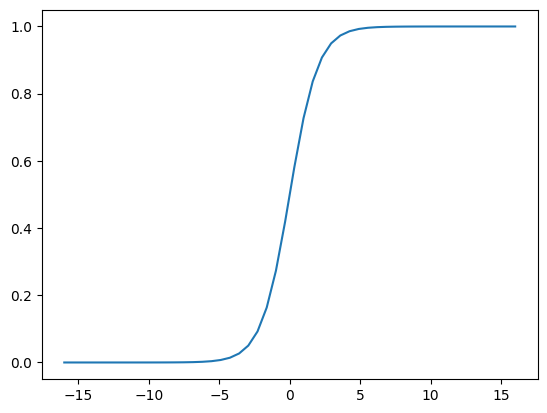

In [17]:
x=np.linspace(-16,16)
plt.plot(x, logistic_function(x)) # sigmoid curve s-shaped curve

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# logistic regression använder numerisk beräkning, typ gradient descent
# behöver skalas

X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

_ = [print(s.shape) for s in [X_train, X_test, y_train, y_test]]


(6700, 3)
(3300, 3)
(6700,)
(3300,)
